In [46]:
import cv2
import imghdr
from matplotlib import pyplot as plt


In [51]:
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']
image_exts


['jpeg', 'jpg', 'bmp', 'png']

In [68]:
os.listdir(os.path.join(data_dir, 'commercial'))

['100 (1).jpeg',
 '100 (1).jpg',
 '100 (10).jpeg',
 '100 (11).jpeg',
 '100 (12).jpeg',
 '100 (13).jpeg',
 '100 (14).jpeg',
 '100 (15).jpeg',
 '100 (16).jpeg',
 '100 (17).jpeg',
 '100 (18).jpeg',
 '100 (19).jpeg',
 '100 (2).jpeg',
 '100 (2).jpg',
 '100 (20).jpeg',
 '100 (3).jpeg',
 '100 (3).jpg',
 '100 (4).jpeg',
 '100 (4).jpg',
 '100 (5).jpeg',
 '100 (6).jpeg',
 '100 (7).jpeg',
 '100 (8).jpeg',
 '100 (9).jpeg',
 '3d-render-of-shopping-mall-interior.jpg',
 'ai-generated-8202874_1280.jpg',
 'airport-4715294_640.jpg',
 'architecture-1235570_1280.jpg',
 'architecture-1815863_640.jpg',
 'architecture-3036697_1280.jpg',
 'architecture-721878_1280.jpg',
 'asphalt-1868569_1280.jpg',
 'beijing-galaxy-soho-6340809_1280.jpg',
 'beijing-galaxy-soho-6340812_1280.jpg',
 'beijing-galaxy-soho-6340815_640.jpg',
 'building-4336443_1280.jpg',
 'building-4336471_640.jpg',
 'building-4339962_640.jpg',
 'building-4442068_1280.jpg',
 'building-4758347_640.jpg',
 'building-4797175_1280.jpg',
 'building-567836

In [60]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

100 (1).jpeg
100 (1).jpg
100 (10).jpeg
100 (11).jpeg
100 (12).jpeg
100 (13).jpeg
100 (14).jpeg
100 (15).jpeg
100 (16).jpeg
100 (17).jpeg
100 (18).jpeg
100 (19).jpeg
100 (2).jpeg
100 (2).jpg
100 (20).jpeg
100 (3).jpeg
100 (3).jpg
100 (4).jpeg
100 (4).jpg
100 (5).jpeg
100 (6).jpeg
100 (7).jpeg
100 (8).jpeg
100 (9).jpeg
3d-render-of-shopping-mall-interior.jpg
ai-generated-8202874_1280.jpg
airport-4715294_640.jpg
architecture-1235570_1280.jpg
architecture-1815863_640.jpg
architecture-3036697_1280.jpg
architecture-721878_1280.jpg
asphalt-1868569_1280.jpg
beijing-galaxy-soho-6340809_1280.jpg
beijing-galaxy-soho-6340812_1280.jpg
beijing-galaxy-soho-6340815_640.jpg
building-4336443_1280.jpg
building-4336471_640.jpg
building-4339962_640.jpg
building-4442068_1280.jpg
building-4758347_640.jpg
building-4797175_1280.jpg
building-5678361_640.jpg
busy-shopping-mall.jpg
christmas-4713985_1280.jpg
christmas-4713989_640.jpg
city-5132735_1280.jpg
close-up-view-of-empty-billboard-in-shopping-mall-with-blu

In [61]:
img = cv2.imread(os.path.join('data', 'commercial', '100(1).jpeg'))

In [62]:
print(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

None


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [63]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


Image not in ext list data\commercial\100 (1).jpeg
Image not in ext list data\commercial\100 (1).jpg
Image not in ext list data\commercial\100 (10).jpeg
Image not in ext list data\commercial\100 (11).jpeg
Image not in ext list data\commercial\100 (12).jpeg
Image not in ext list data\commercial\100 (13).jpeg
Image not in ext list data\commercial\100 (14).jpeg
Image not in ext list data\commercial\100 (15).jpeg
Image not in ext list data\commercial\100 (16).jpeg
Image not in ext list data\commercial\100 (17).jpeg
Image not in ext list data\commercial\100 (18).jpeg
Image not in ext list data\commercial\100 (19).jpeg
Image not in ext list data\commercial\100 (2).jpeg
Image not in ext list data\commercial\100 (2).jpg
Image not in ext list data\commercial\100 (20).jpeg
Image not in ext list data\commercial\100 (3).jpeg
Image not in ext list data\commercial\100 (3).jpg
Image not in ext list data\commercial\100 (4).jpeg
Image not in ext list data\commercial\100 (4).jpg
Image not in ext list da

Use Keras to Load Data

In [64]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [65]:
import numpy as np
from matplotlib import pyplot as plt


In [66]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 0 files belonging to 2 classes.


ValueError: No images found in directory data. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [15]:
#cannot grab data directily, this is a generator
data_iterator = data.as_numpy_iterator()

In [16]:
#gets another batch from generator(batch size is 32 but can easily alter size of batch)
batch = data_iterator.next()

In [395]:
#Images as numpy array
batch[0].shape

(32, 256, 256, 3)

In [17]:
#dictates either commercial(0) or residential(1)
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
scaled = batch[0]/255
scaled.max()

1.0

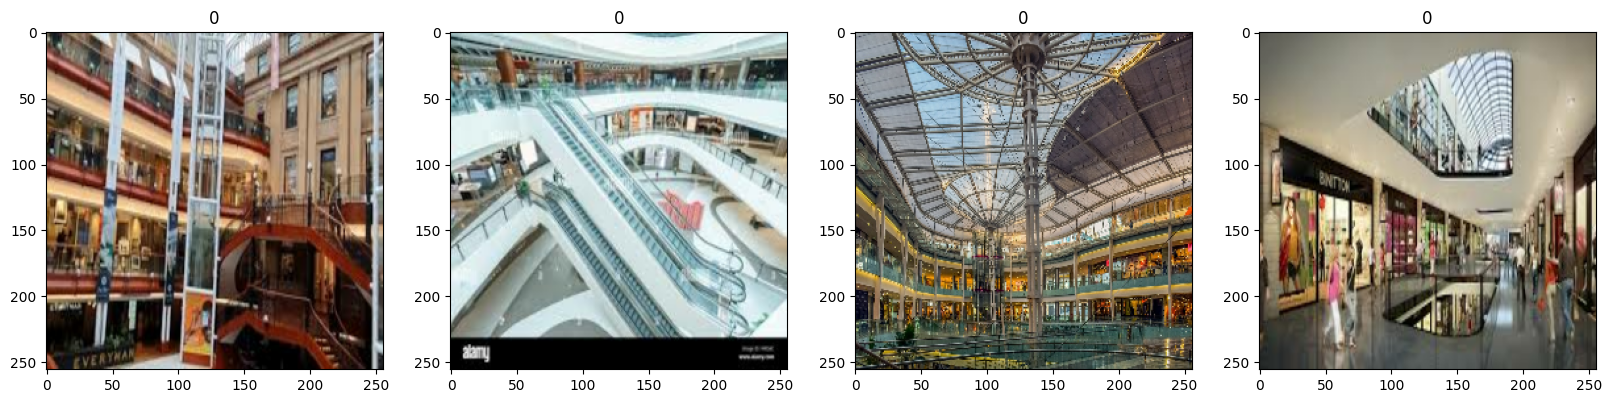

In [19]:
fig, ax = plt.subplots(ncols = 4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocess, Train Data

In [20]:
data = data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()


In [21]:
batch[0].max()

1.0

In [22]:
batch

(array([[[[1.97686888e-02, 6.29059449e-02, 8.61136615e-02],
          [2.40119491e-02, 6.52190596e-02, 8.18704069e-02],
          [2.26256121e-02, 5.08808196e-02, 7.11933225e-02],
          ...,
          [7.92355984e-02, 1.18451290e-01, 1.22372858e-01],
          [7.15533122e-02, 1.10768996e-01, 1.14690565e-01],
          [6.30667880e-02, 1.02282472e-01, 1.06204048e-01]],
 
         [[2.42110901e-02, 6.73483461e-02, 9.05560628e-02],
          [2.81810388e-02, 6.99347705e-02, 8.63128081e-02],
          [2.53023338e-02, 5.70889041e-02, 7.60912448e-02],
          ...,
          [7.70144016e-02, 1.16230085e-01, 1.20151654e-01],
          [7.12799951e-02, 1.10495687e-01, 1.14417255e-01],
          [6.51968867e-02, 1.04412571e-01, 1.08334139e-01]],
 
         [[2.98762899e-02, 7.50995725e-02, 9.83072892e-02],
          [3.55892107e-02, 7.80290514e-02, 9.40640345e-02],
          [3.06142773e-02, 6.72794133e-02, 8.41911733e-02],
          ...,
          [7.29157403e-02, 1.12131424e-01, 1.1605

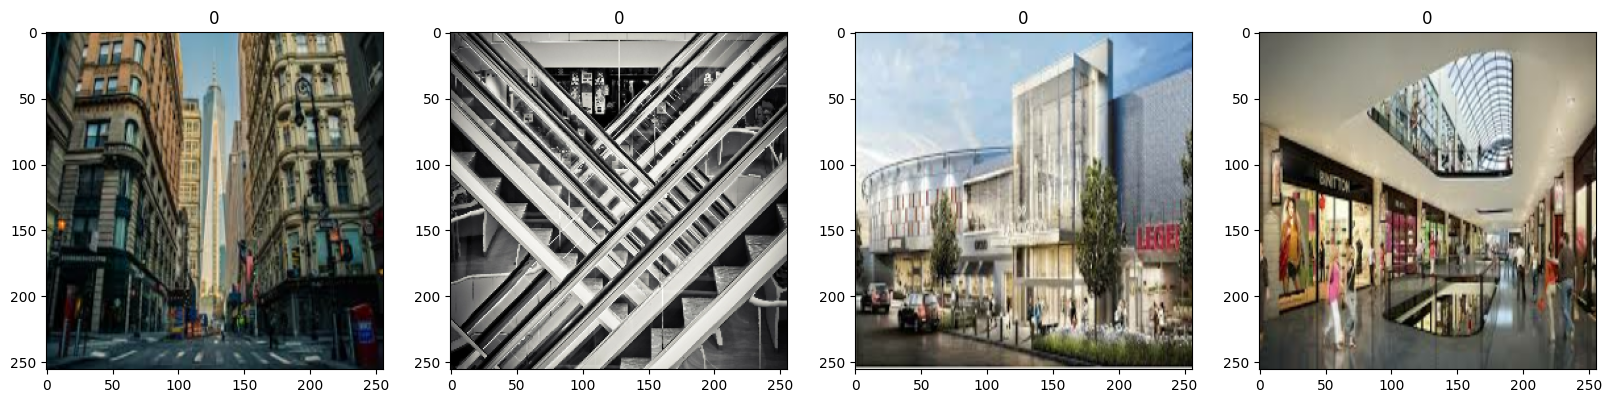

In [23]:
fig, ax = plt.subplots(ncols = 4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [24]:
len(data)

7

In [25]:
#training data used for training model, validation data used validation model(fine tune), final state is test data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [26]:
test_size+val_size+train_size

7

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Deep Learing Model

In [28]:
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation= 'relu' , input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))


In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train/Log our data

In [33]:
logdir = 'logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [35]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 0.2065 - accuracy: 0.7500 - val_loss: 2.9990e-12 - val_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 4s 1s/step - loss: 9.4512e-09 - accuracy: 1.0000 - val_loss: 1.0929e-17 - val_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 4s 1s/step - loss: 1.1188e-10 - accuracy: 1.0000 - val_loss: 4.7439e-21 - val_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 4s 985ms/step - loss: 7.7233e-12 - accuracy: 1.0000 - val_loss: 3.4580e-12 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 2.6807e-13 - accuracy: 1.0000 - val_loss: 1.3600e-22 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 9.6565e-14 - accuracy: 1.0000 - val_loss: 5.5092e-14 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 4s 1s/step - loss: 1.0365e-14 - accuracy: 1.0000 - val_loss: 6.6297e-25 - val_acc

In [36]:
hist.history

{'loss': [0.2065042406320572,
  9.451227356294112e-09,
  1.1187727827488558e-10,
  7.723304634721373e-12,
  2.6807229396366705e-13,
  9.656502892229843e-14,
  1.036463395578252e-14,
  3.942158252124347e-15,
  2.253608492673303e-30,
  1.7446872304144778e-15,
  4.1594298664580845e-31,
  7.896160777708387e-16,
  6.539520516254786e-16,
  5.476379288607168e-16,
  2.6993855285760886e-27,
  4.897827727666103e-16,
  4.799487202489878e-16,
  4.655550364367363e-16,
  4.525993498711266e-16,
  4.47464636144871e-16],
 'accuracy': [0.75,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [2.9990315786321275e-12,
  1.092941583811311e-17,
  4.743872735055944e-21,
  3.4579817308200145e-12,
  1.3599561895759115e-22,
  5.5091846205444425e-14,
  6.629725098135797e-25,
  1.3605311469023774e-25,
  3.4893744608289557e-15,
  2.2621238819034873e-15,
  1.6755299548864796e-15,
  2.641637438148101e-31,
  8.043699780176

Plotting our peformance


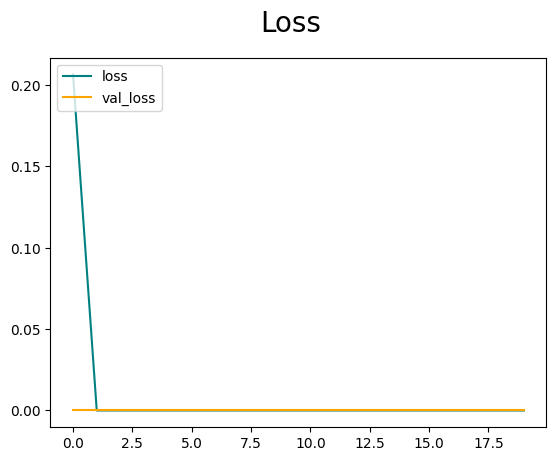

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

Final Step- Evaluate Peformance

In [48]:
from tensorflow import keras
from keras.metrics import Precision, Recall, BinaryAccuracy


In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [40]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 284ms/step


In [41]:
print(f'Precision:{pre.result().numpy}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy}')

Precision:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.0>>, Recall:0.0, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


Test

In [49]:
img = cv2.imread('File Name of Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


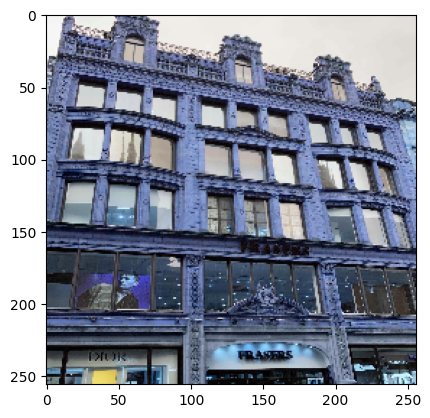

In [443]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [444]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [445]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 36ms/step


In [446]:
yhat

array([[0.92625636]], dtype=float32)

In [447]:
if yhat > 0.5:
    print(f'Predicted estate is residential')
else:
    print(f'Predicted estate is commercial')

Predicted estate is residential


Save Model


In [284]:
from tensorflow import keras
from keras.models import load_model

In [448]:
#model.save(os.path.join('models', 'CommercialResidentialF.h5'))

c:\Users\jy3df\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [453]:
os.path.join('models', 'CommercialResidentialF.h5')

'models\\CommercialResidentialF.h5'

In [454]:
new_model = load_model(os.path.join('models', 'CommercialResidentialF.h5'))

In [455]:
yhatnew = new_model.predict(np.expand_dims(resize/255),0)

In [ ]:
if yhatnew > 0.5:
    print(f'Predicted estate is residential')
else:
    print(f'Predicted estate is commercial')